In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_location  = '../../../../data/results/'

In [3]:
results_files = ['careful_iterations=887_samples=900083_scalefunc=K_0_delta=500_centroids=346_sizeBytes=5568_impl=merging_alt_false.csv',
 'careful_iterations=890_samples=2413634_scalefunc=K_0_delta=500_centroids=350_sizeBytes=4232_impl=tree.csv',
 'careful_iterations=889_samples=1038262_scalefunc=K_0_delta=500_centroids=348_sizeBytes=5600_impl=merging_alt_true.csv']

In [4]:
class TDigestRun(object):
    
    def __init__(self, f):
        self.filename = f
        
    def readable_name(self):
        return self.filename.rstrip('.csv').split('=')[-1]

    def set_df(self, df):
        self.df = df
        
    def plot_data(self):
        plt.plot(self.df['true quantile'][:200], self.df['abs. error'][:200], label=self.readable_name())

In [5]:
digests = []

for fname in results_files:
    tdr = TDigestRun(fname)
    with open(results_location + fname, 'r') as f:
        tdr.set_df(df = pd.read_csv(f, header=0, sep=';'))
    digests.append(tdr)

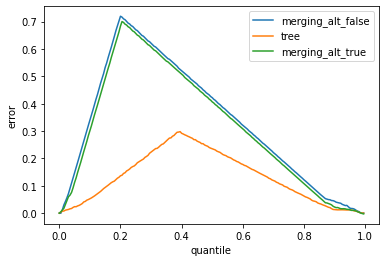

In [6]:
for t in digests:
    t.plot_data()

plt.legend()
plt.xlabel('quantile')
plt.ylabel('error')
plt.show()